## Special Methods Overview

Instances of user defined classes can be made to work with all of the Python's built-in operators by adding implementation of the special methods to a class.

Objects in Python are generally classified by their features that they implement.  All monadic and dyadic operations on objects trigger special class methods if defined.  For example, x + y triggers the internal method <b>x.__add__(y)</b> and an indexing operation x[k] invokes the <b>x.__getitem__(k)</b> method.  The behavior of each class type depends entirely on the set of speical methods that are implemented in the class.

In [5]:
class A:
    def __init__(self,n):
        self.value = n
    def __add__(self, operand):
        return self.value + operand.value
    
m = A(3)
n = A(100)

m+n
    

103

### Object Creation and Destruction

The __init__() method is invoked to initialize an instance.  It implicitly invokes the __new__() method to create the object.  The method __del__() is invoked when an object is destroyed as part of the Python garbase collection.  Note that the function del() decrements the reference count.

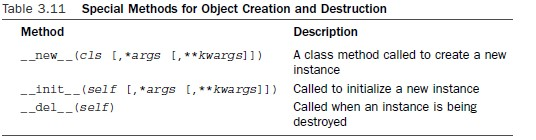

## Object String Representation

The methods in Table 3.12 are used to create various string representations of an object.  These are very similar to the Java toString() method that can be defined in a class.  These methods are invoked by the functions repr(), eval(), and format()

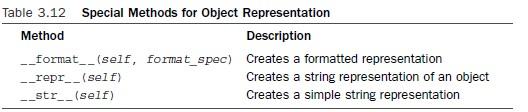

## Object Comparison and Ordering

Objects can implement on eor more of the relational operators (<, >, <=, >=, ==, !=).  Each of these methods is allowed to return any kind of object besides a boolean True or False.  If a comparison can't be made, then an exception may be raised.  Table 3.14 shows the special methods for each comparison operator.

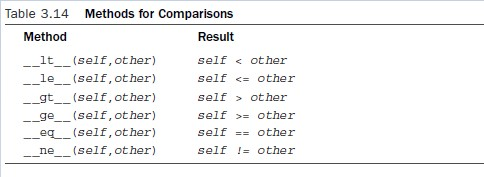

In [6]:
class A:
    def __init__(self,n):
        self.value = n
    def __lt__(self, operand):
        return self.value < operand.value
    
m = A("he")
n = A("hello")

m < n

True

## Attribute Access

The methods in Table 3.16 are used to manipulate the attributes of an object.  Whenever an attribute is accessed, the <b>\_\_getattribute__()</b> method is invoked.  If the attribute is located, it is returned.  Otherwise, the __getattr__() method is invoked.  The <b>\_\_setattr__()</b> method is always invoked when setting an attribute.

In [3]:
class A:
    def __init__(self,n):
        self.value = n
    def __setattr__(self, name, value):
        print("custom setattr()")
        super(A, self).__setattr__(name,value)
        return 
    def __getattribute__(self, name):
        return super(A, self).__getattribute__(name)
    
n = A("hello")

n.value = "ciao"
print(n.value)


custom setattr()
custom setattr()
ciao


## Iteration

If a class supports iteration, it must provide a methoc <b>obj.__iter__()</b> that returns an iterator object.  The iterator class <b>iter</b> must implement a single method <b>\_\_iter_next__()</b> that returns the next object in a collection or raises StopIteration to signal the end of the iteration.  Both of these methods are used in the implementation of the enhanced for: statement as well as other operations that perform implicit iteration.

In [11]:
# A simple Python program to demonstrate
# working of iterators using an example type
# that iterates from 10 to given value

# An iterable user defined type
class Test:

	# Constructor
	def __init__(self, limit):
		self.limit = limit

	# Creates iterator object
	# Called when iteration is initialized
	def __iter__(self):
		self.x = 10
		return self

	# To move to next element. In Python 3,
	# we should replace next with __next__
	def __next__(self):

		# Store current value ofx
		x = self.x

		# Stop iteration if limit is reached
		if x > self.limit:
			raise StopIteration

		# Else increment and return old value
		self.x = x + 1;
		return x

# Prints numbers from 10 to 15
for i in Test(15):   #for processing catches the StopIteration exception
	print(i)
    
#simulate for loop using iterator
itr = Test(12).__iter__()
try:
    while True:
        n = itr.__next__()
        print(n)
except StopIteration:
    print("StopIteration exception detected")



10
11
12
13
14
15
10
11
12
StopIteration exception detected


## Mathematical Operations

Methods may be implemented to emulate mathematical operations.  Table 3.19 lists the method names and the associated operations.  When an expression like x+y is used, the method x.__add__(y) is invoked.

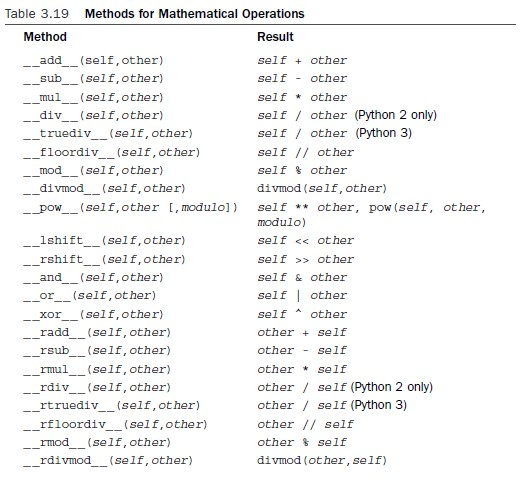

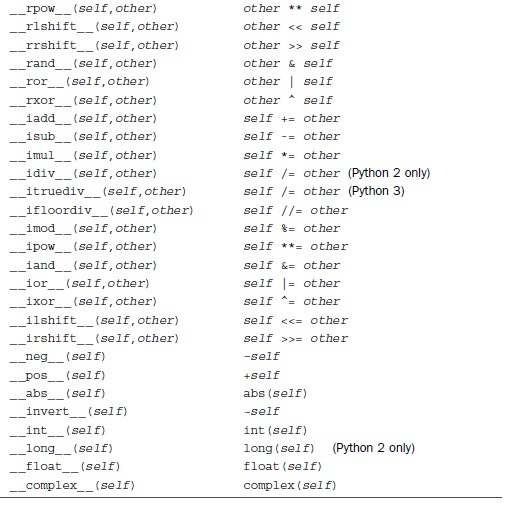